# A blogging workflow with Jupyter and Wordpress
**Abstract:** How to convert your Jupyter notebook as blog post, including all the Wordpress features, plots, custom formatting, and latex formulas. Image histogram equalization as an example blog post.

For me, [Jupyter](http://jupyter.org/) is a ready made solution for two problems simultaneously. It's a great tool for prototyping all sorts of algorithms in the [SciPy](https://www.scipy.org/) environment, while it also does a fantastic job in taking up notes on the mathematics behind those algorithms, thanks to Markdown and the beautiful MathML formatting of mathematical formulas in Latex syntax.

To publish a Jupyter notebook, you can simply upload the .ipynb file to GitHub, which renders as a static page as you open it there like [this][this]. However, when writing a blog, you would like to have your own site style, and more site structure and features, other than just dropping individual notebooks here and there. 

To easily maintain a blogging site with styles, site structure, and comments, there's [WordPress](https://wordpress.com/). I will explain my attempt to translate a Jupyter notebook to a post in Wordpress with minimal manual labour. The steps are very similar to the ones in a post by [Mian Chen][mianchen], which helped me a lot. The process has three main steps

1. Write a blog post in a Jupyter notebook
2. Convert the notebook to plain HTML and copy and paste it into your WordPress post
3. Setup WordPress to properly format Latex syntax as MathML and various cells nicely with CSS, you need to do this step only once

In the following sections, I will explain those steps in detail.  

[this]: [https://github.com/mattipellikka/blog/blob/master/how_to_wordpress/how_to_wordpress.ipynb]
[mianchen]: http://www.mianchen.com/wordpress-blogging-with-jupyter-notebook-in-five-simple-steps/

## Example post
Here's a simple blog post to demonstrate various things a wanted to work in the resulting Wordpress post: Markdown notes with Latex formulas in MathML, Matplotlib image output, and code sections properly formatted. This is also a boilerplate for most of my Jupyter notebooks.

### Histogram equalization
Histogram equalization is a technique to evenly distribute intesity levels of an image. It is useful for example when one wants to enhance contrast of a low contrast image. Here, I will derive transformation function $y = T(x)$ to map input image intensities $x$ output image intensities $y$ so that the output image histogram is as uniform as possible with the integer intensity levels on the interval $[0, 255]$. We require that $T(0) = 0$ and $T(255) = 255$ hold to ensure that the intensities remain on the 8-byte range, and that $T(x)$ is strictly increasing, to ensure that order of intensities is not changed. Then, the inverse transformation $T^{-1}(x)$ exists.



Denote by $p_x(x)$ and $p_y(y)$ the intensity distribution of the input and output images, respectively. For a while, let us consider them as continuous probability distribution, denoting the probability at which an intensity $x$ appears in the image.
By the change of variable formula of integration

$$
\int_{T(a)}^{T(b)} p_y(y) \,\mathrm{d} y = \int_{a}^{b} p_y(T(x)) T'(x) \, \mathrm{d} x := \int_{a}^{b} p_x(x) \, \mathrm{d} x
$$

must hold for any intensity interval $[a, b] \subset [0, 255]$. Let us choose an interval $[0, y]$, and remember that we required that the intensity distribution of the output image is uniform. That is, $p_y(y) = C$ holds with some constant $C$. Therefore,

$$
\int_{0}^{y} C \,\mathrm{d} y' = Cy = \int_{0}^{T^{-1}(y)} p_x(x) \, \mathrm{d} x
$$

holds. By substituting $y = T(x)$, we obtain the transformation $T(x)$:

$$
T(x) = \frac{1}{C}\int_{0}^{x} p_x(x') \, \mathrm{d} x',
$$

where the constant $C$ is determined by the condition that $T(255) = 255$ holds:

$$
C = \frac{1}{255}\int_{0}^{255} p_x(x) \, \mathrm{d} x.
$$

In summary, the final form of the transformation $T(x)$ is:

$$
T(x) = \frac{255\int_{0}^{x} p_x(x') \, \mathrm{d} x'}{\int_{0}^{255} p_x(x) \, \mathrm{d} x},
$$

In the discrete setting, we replace integrals by sums and obtain:

$$
T(x) = \frac{255\sum_{i=0}^{x} p_x(i)}{\sum_{i=0}^{255} p_x(i)}
$$

where $p_x(i)$ is the proportion of the pixels in the input image with intensity value $i$. Below is a simple Python implementaion of this procedure.


In [167]:
# preample
import numpy as np
import matplotlib.pyplot as plt; 
from IPython.display import display
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

In [168]:
# function to compute image histogram
def histogram(im):
    hist = np.zeros(255, dtype='uint32')
    for i in range(0,255):
        hist[i] = im[im == i].size  
    return hist

# image histogram equalization
def equalize(im):
    hist = histogram(im)
    map = np.zeros(255,dtype='double')
    for i in range(0,255):
        map[i] = np.sum(hist[0:i])
    map = (map/np.amax(map)*255).astype('uint8')
    
    im2 = np.zeros_like(im)
    for i in range(0,255):
        im2[im==i] = map[im[im == i]]
    
    return im2


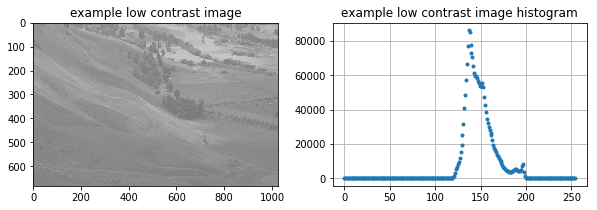

In [172]:
# read and plot and example image and its histogram

from skimage import io

im = io.imread("bay.jpg")
hist = histogram(im)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title('example low contrast image')
plt.subplot(1, 2, 2)
plt.plot(hist,'.')
plt.title('example low contrast image histogram')
plt.grid()

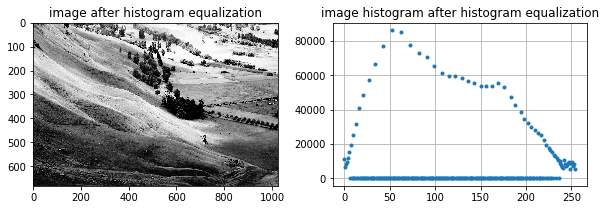

In [173]:
# image and its histogram after histogram equalization

im2 = equalize(im)
hist2 = histogram(im2)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(im2)
plt.title('image after histogram equalization')
plt.subplot(1, 2, 2)
plt.plot(hist2,'.')
plt.grid()
plt.title('image histogram after histogram equalization')

## Convert Jupyter notebook as HTML
To convert the Jupyter notebook .ipynb file as basic HTML run the following command:

Linux: 
```
jupyter nbconvert --to html --template basic notebook.ipynb notebook.html

```


Windows: 
```
jupyter-nbconvert.exe --to html --template basic notebook.ipynb notebook.html

```
Assuming the folder of ```jupyter-nbconvert.exe``` is specified in your PATH environment variable.

## WordPress setup

1. To properly display Latex syntax inside \$ \$, \$\$ \$\$, or various other Latex tags suported by Jupyter notebook, install *QuickLaTeX* WordPress plugin. To make it automatically enabled in all your posts, in WordPress, go to *QuickLaTeX* -> *Advanced* and enable *Use LaTeX Syntax Sitewide*. 

2. To format your notebook nicely, in WordPress, go to *Appearance* -> *Edit CSS*, and copy and paste the following definitions in the *Additional CSS* dialog. You may customize the style for your liking.

```CSS
/************** Jupyter Notebook CSS ************************/
.input_prompt {
    color: #0066cc;
}
.output_prompt{
    color:#cc0000;
}
.prompt{
    font-family: monospace;
    font-size: 14px;
}
.c, c1 {
    color: #408080;
    font-style: italic;
}
.k {
    color: #338822;
    font-weight: bold;
}
.kn {
    color: #338822;
    font-weight: bold;
}
.mi {
    color: #008800;
}
.mf {
    color: #008800;
}
.o {
    color: #9966ff;
}
.ow {
    color: #BA22FF;
    font-weight: bold;
}
.nb {
    color: #338822;
}
.n {
    color: #000000;
}
.s, .s1 {
    color: #cc2222;
}
.se {
    color: #cc2222;
    font-weight: bold;
}
.si {
    color: #C06688;
    font-weigh
    t: bold;
}
.nn {
    color: #4D00FF;
    font-weight: bold;
}
.output_area pre {
    background-color: #FFFFFF;
    padding-left: 5%;
}
.code_cell {
    padding-left: 1%;
}
.cell {
    margin-top: 10px;
    margin-bottom: 10px;
}
br {
    line-height: 2;
}
.cell h1, h2, h3, h4 {
    margin-top: 30px;
    margin-bottom: 10px;
}
/************** Jupyter Notebook CSS ************************/
```

## Done
Of course, whis will be a static version of your Jupyter notebook, so you might want to host the actual .ipynb file at [GitHub](https://github.com/) or similiar page to let others easily modify and run your notebook.
